In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import re 
# Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

# Algorithmes
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

In [4]:
df_fake = pd.read_csv('Fake.csv')
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_fake['label']=0


In [6]:
df_true = pd.read_csv('True.csv')
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
df_true['label']=1

In [8]:
df=pd.concat([df_fake,df_true],ignore_index=True)
df = df.sample(frac = 1,random_state=24).reset_index(drop=True)
df.head()

,title,text,subject,date,label
0,WHOA! MICHAEL MOORE Says TRUMP Is Only Hope To...,"Every nameless, beaten down, forgotten workin...",politics,"Oct 25, 2016",0
1,Factbox: What to watch in negotiations over de...,WASHINGTON (Reuters) - Republican leaders are ...,politicsNews,"December 5, 2017",1
2,Army chief says Pakistan should 'revisit' Isla...,"QUETTA, Pakistan (Reuters) - Pakistan s army c...",worldnews,"December 7, 2017",1
3,Je Suis HYPOCRITES: FREE SPEECH IS EMBRACED WH...,"Sooo when terrorists attack Je Suis Charlie, a...",left-news,"May 5, 2015",0
4,Trump declares national emergency on opioid abuse,"BEDMINSTER, N.J. (Reuters) - U.S. President Do...",politicsNews,"August 10, 2017",1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [10]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [11]:
df.duplicated().sum()

209

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.head()

,title,text,subject,date,label
0,WHOA! MICHAEL MOORE Says TRUMP Is Only Hope To...,"Every nameless, beaten down, forgotten workin...",politics,"Oct 25, 2016",0
1,Factbox: What to watch in negotiations over de...,WASHINGTON (Reuters) - Republican leaders are ...,politicsNews,"December 5, 2017",1
2,Army chief says Pakistan should 'revisit' Isla...,"QUETTA, Pakistan (Reuters) - Pakistan s army c...",worldnews,"December 7, 2017",1
3,Je Suis HYPOCRITES: FREE SPEECH IS EMBRACED WH...,"Sooo when terrorists attack Je Suis Charlie, a...",left-news,"May 5, 2015",0
4,Trump declares national emergency on opioid abuse,"BEDMINSTER, N.J. (Reuters) - U.S. President Do...",politicsNews,"August 10, 2017",1


In [14]:
# extract the month
x='June 28, 2016'
re.split('\s',x,1)#[0]

['June', '28, 2016']

In [15]:
df['month']=df['date'].apply(lambda x:re.split('\s',x,1)[0])

In [16]:
# extract the day
x='June 28, 2016'
re.search('\d{2}',x).group()

'28'

In [17]:
# df['day']=df['date'].apply(lambda x:re.search('\d{2}',x).group())
# it does not work because some dates do not have a day
def _day_(x):
    try:
        value=re.search('\d{2}',x).group()
    except:
        value= df['day']=np.nan
    return value
df['day']=df['date'].apply(_day_)

In [18]:
# extract the year
x='June 28, 2016'
re.search('\d{4}',x).group()

'2016'

In [19]:
#df['year']=df['date'].apply(lambda x:re.search('\d{4}',x).group())
#it does not work because some dates do not have a year
def _year_(x):
    try:
        value=re.search('\d{4}',x).group()
    except:
        value= df['year']=np.nan
    return value
df['year']=df['date'].apply(_year_)

In [20]:
df.head()

,title,text,subject,date,label,month,day,year
0,WHOA! MICHAEL MOORE Says TRUMP Is Only Hope To...,"Every nameless, beaten down, forgotten workin...",politics,"Oct 25, 2016",0,Oct,25,2016
1,Factbox: What to watch in negotiations over de...,WASHINGTON (Reuters) - Republican leaders are ...,politicsNews,"December 5, 2017",1,December,20,2017
2,Army chief says Pakistan should 'revisit' Isla...,"QUETTA, Pakistan (Reuters) - Pakistan s army c...",worldnews,"December 7, 2017",1,December,20,2017
3,Je Suis HYPOCRITES: FREE SPEECH IS EMBRACED WH...,"Sooo when terrorists attack Je Suis Charlie, a...",left-news,"May 5, 2015",0,May,20,2015
4,Trump declares national emergency on opioid abuse,"BEDMINSTER, N.J. (Reuters) - U.S. President Do...",politicsNews,"August 10, 2017",1,August,10,2017


In [21]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
label       0
month       0
day         1
year       39
dtype: int64

In [22]:
# drop rows that have null values
df.dropna(inplace=True)

In [23]:
df.month.unique()

array(['Oct', 'December', 'May', 'August', 'November', 'April', 'June',
       'October', 'Nov', 'January', 'Aug', 'March', 'Jun', 'Jul', 'Feb',
       'September', 'February', 'July', 'Mar', 'Jan', 'Dec', 'Sep', 'Apr',
       'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg',
       'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg'],
      dtype=object)

In [24]:
# drop rows 2718,36769,42879
df.drop([2718,36769,42879],axis=0,inplace=True)

In [25]:
df[df['month']=='https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg']

,title,text,subject,date,label,month,day,year
35210,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0,https://fedup.wpengine.com/wp-content/uploads/...,20,2015
42816,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0,https://fedup.wpengine.com/wp-content/uploads/...,20,2015
43581,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,https://fedup.wpengine.com/wp-content/uploads/...,20,2015


In [26]:
# drop rows 35210,42816,43581
df.drop([35210,42816,43581],axis=0,inplace=True)

In [27]:
df.month.unique()

array(['Oct', 'December', 'May', 'August', 'November', 'April', 'June',
       'October', 'Nov', 'January', 'Aug', 'March', 'Jun', 'Jul', 'Feb',
       'September', 'February', 'July', 'Mar', 'Jan', 'Dec', 'Sep', 'Apr'],
      dtype=object)

In [28]:
mon = {'January':'01',
        'February':'02',
        'March':'03',
        'April':'04',
        'May':'05',
        'June':'06',
        'July':'07',
        'August':'08',
        'September':'09',
        'October':'10',
        'November':'11',
        'December':'12',
        'Jan':'01',
        'Feb':'02',
        'Mar':'03',
        'Apr':'04',
        'Jun':'06',
        'Jul':'07',
        'Aug':'08',
        'Sep':'09',
        'Oct':'10',
        'Nov':'11',
        'Dec':'12'}
df['month']=df['month'].map(mon)

In [29]:
df['month'].unique()


array(['10', '12', '05', '08', '11', '04', '06', '01', '03', '07', '02',
       '09'], dtype=object)

In [30]:
# now create a new date column clearly
df['new_date']=df['year']+'-'+df['month']+'-'+df['day']

In [31]:
df.head()

,title,text,subject,date,label,month,day,year,new_date
0,WHOA! MICHAEL MOORE Says TRUMP Is Only Hope To...,"Every nameless, beaten down, forgotten workin...",politics,"Oct 25, 2016",0,10,25,2016,2016-10-25
1,Factbox: What to watch in negotiations over de...,WASHINGTON (Reuters) - Republican leaders are ...,politicsNews,"December 5, 2017",1,12,20,2017,2017-12-20
2,Army chief says Pakistan should 'revisit' Isla...,"QUETTA, Pakistan (Reuters) - Pakistan s army c...",worldnews,"December 7, 2017",1,12,20,2017,2017-12-20
3,Je Suis HYPOCRITES: FREE SPEECH IS EMBRACED WH...,"Sooo when terrorists attack Je Suis Charlie, a...",left-news,"May 5, 2015",0,05,20,2015,2015-05-20
4,Trump declares national emergency on opioid abuse,"BEDMINSTER, N.J. (Reuters) - U.S. President Do...",politicsNews,"August 10, 2017",1,08,10,2017,2017-08-10


In [32]:
# now I can convert to date time
df['new_date']=pd.to_datetime(df['new_date'])

In [33]:
# drop columns 'date','day','month','year'
df.drop(columns=['date','day','month','year'],inplace=True)

In [34]:
df.head()

,title,text,subject,label,new_date
0,WHOA! MICHAEL MOORE Says TRUMP Is Only Hope To...,"Every nameless, beaten down, forgotten workin...",politics,0,2016-10-25
1,Factbox: What to watch in negotiations over de...,WASHINGTON (Reuters) - Republican leaders are ...,politicsNews,1,2017-12-20
2,Army chief says Pakistan should 'revisit' Isla...,"QUETTA, Pakistan (Reuters) - Pakistan s army c...",worldnews,1,2017-12-20
3,Je Suis HYPOCRITES: FREE SPEECH IS EMBRACED WH...,"Sooo when terrorists attack Je Suis Charlie, a...",left-news,0,2015-05-20
4,Trump declares national emergency on opioid abuse,"BEDMINSTER, N.J. (Reuters) - U.S. President Do...",politicsNews,1,2017-08-10


# EDA

In [35]:
# min date
df['new_date'].min()

Timestamp('2015-03-31 00:00:00')

In [36]:
# max date
df['new_date'].max()

Timestamp('2017-12-31 00:00:00')

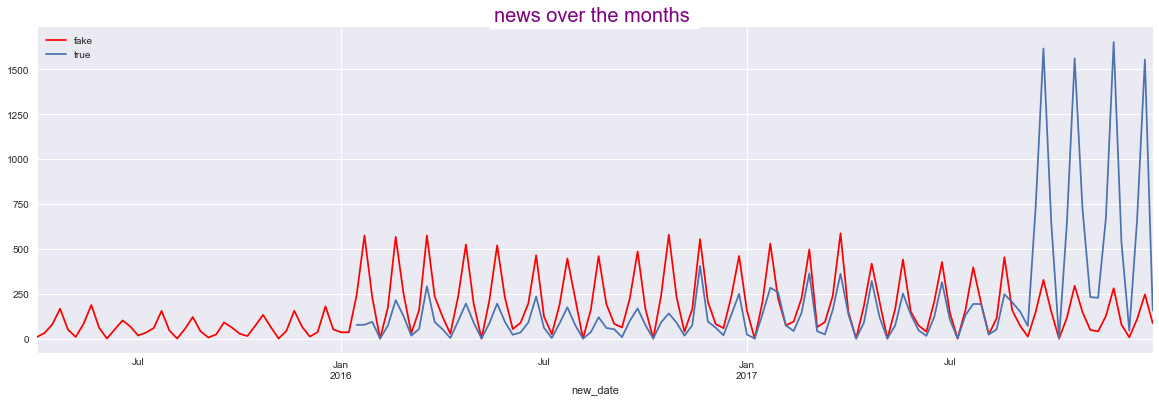

In [37]:
plt.figure(figsize=(20,6))
df[df['label']==0].groupby([pd.Grouper(key='new_date', freq='W')])['label'].count().plot(kind='line',label='fake',c='red')
df[df['label']==1].groupby([pd.Grouper(key='new_date', freq='W')])['label'].count().plot(kind='line',label='true')
plt.title("news over the months ",
          fontsize='20',
          backgroundcolor='white',
          color='Purple')
plt.legend();

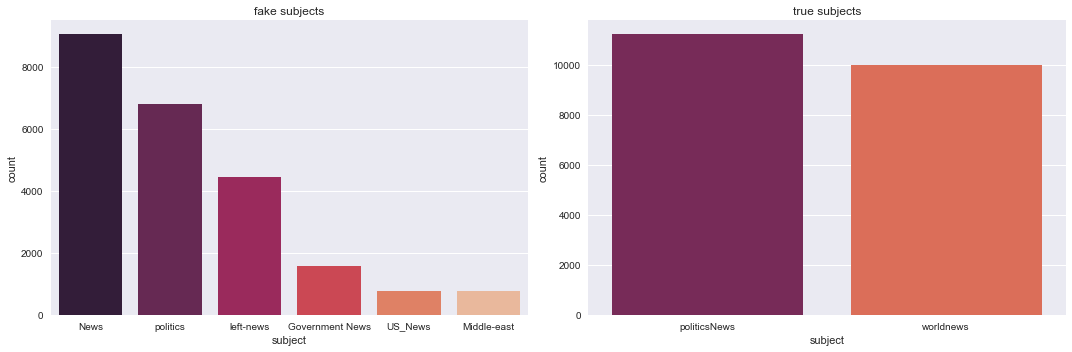

In [38]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
sns.countplot(x='subject',data=df[df['label']==0],palette='rocket', order = df[df['label']==0]['subject'].value_counts().index,ax=ax[0]).set(title='fake subjects')  #rocket_r  
sns.countplot(x='subject',data=df[df['label']==1],palette='rocket', order = df[df['label']==1]['subject'].value_counts().index,ax=ax[1]).set(title='true subjects')
plt.tight_layout();

# Data Modeling

In [39]:
df['txt']=df['title']+' '+df['text']

In [40]:
# the data is very big and it take more time so I will use only 10000 rows
min_df=df.head(10000)

In [41]:
min_df.head()

,title,text,subject,label,new_date,txt
0,WHOA! MICHAEL MOORE Says TRUMP Is Only Hope To...,"Every nameless, beaten down, forgotten workin...",politics,0,2016-10-25,WHOA! MICHAEL MOORE Says TRUMP Is Only Hope To...
1,Factbox: What to watch in negotiations over de...,WASHINGTON (Reuters) - Republican leaders are ...,politicsNews,1,2017-12-20,Factbox: What to watch in negotiations over de...
2,Army chief says Pakistan should 'revisit' Isla...,"QUETTA, Pakistan (Reuters) - Pakistan s army c...",worldnews,1,2017-12-20,Army chief says Pakistan should 'revisit' Isla...
3,Je Suis HYPOCRITES: FREE SPEECH IS EMBRACED WH...,"Sooo when terrorists attack Je Suis Charlie, a...",left-news,0,2015-05-20,Je Suis HYPOCRITES: FREE SPEECH IS EMBRACED WH...
4,Trump declares national emergency on opioid abuse,"BEDMINSTER, N.J. (Reuters) - U.S. President Do...",politicsNews,1,2017-08-10,Trump declares national emergency on opioid ab...


In [42]:
min_df.iloc[1495]['txt']

'SHOCKING SUMMARY Of The DNC Convention So Far…Did We Leave Anything Out? What a crazy group of professional agitators and political scumbags this has been REALLY entertaining and a bit creepy too '

In [43]:
tl=WordNetLemmatizer()
corpus=[]
for i in np.arange(len(min_df)):
    line =re.sub(r'[^a-zA-Z]',' ',min_df.iloc[i]['txt'])
    line=line.lower()
    line=line.split()
    line=[tl.lemmatize(word) for word in line if word not in stopwords.words('english')]
    line=" ".join(line)
    corpus.append(line)

In [44]:
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()
y=min_df['label']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=24, shuffle =True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 56599), (3000, 56599), (7000,), (3000,))

In [46]:
train_scores = []
test_scores = []
CV=[]

def algorithm(model):
    # Training model
    model.fit(x_train,y_train)
            
    # score of train set
    train_model_score = model.score(x_train,y_train)
    train_scores.append(round(train_model_score,2))
    y_pred_train=model.predict(x_train)
    
    # score of test set
    test_model_score = model.score(x_test,y_test)
    test_scores.append(round(test_model_score,2))
    y_pred_test=model.predict(x_test)
    
    # train set using Cross validation
    cross_val = cross_val_score(model ,x_train ,y_train ,cv=10)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
     
    # Printing results
    print("Train score :",round(train_model_score,2))
    print("Test score :",round(test_model_score,2))
    #print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    df_model = pd.DataFrame(classification_report(y_pred_test,y_test, digits=2,output_dict=True)).T
    df_model['support'] = df_model.support.apply(int)
    df_model.style.background_gradient(cmap='viridis',subset=pd.IndexSlice['0':'9', :'f1-score'])
    display(df_model)
    
    print("\n----------------------Confusion Matrix---------------------- \n")
    conf_mat = confusion_matrix(y_test, y_pred_test)
    plot_confusion_matrix(conf_mat,
                      show_normed=True, colorbar=True,
                      class_names=['Fake', 'Real'])
    plt.show()


# Gaussian Naive Bayes

Train score : 0.98
Test score : 0.83
Train CV mean : 0.85


,precision,recall,f1-score,support
0,0.858479,0.834040,0.846083,1651
1,0.803725,0.831727,0.817486,1349
accuracy,0.833000,0.833000,0.833000,0
macro avg,0.831102,0.832884,0.831785,3000
weighted avg,0.833858,0.833000,0.833224,3000



----------------------Confusion Matrix---------------------- 



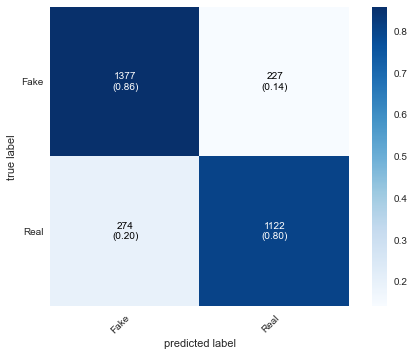

In [47]:
gnv=GaussianNB()
algorithm(gnv)

# Bernoulli Naive Bayes

Train score : 0.98
Test score : 0.96
Train CV mean : 0.96


,precision,recall,f1-score,support
0,0.950748,0.967640,0.959119,1576
1,0.963467,0.944522,0.953901,1424
accuracy,0.956667,0.956667,0.956667,0
macro avg,0.957108,0.956081,0.956510,3000
weighted avg,0.956785,0.956667,0.956642,3000



----------------------Confusion Matrix---------------------- 



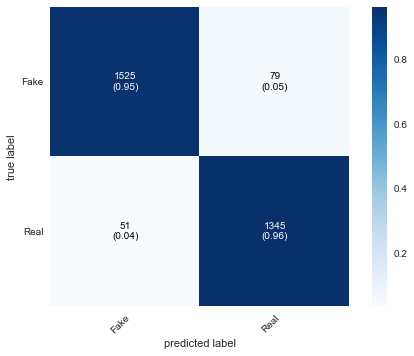

In [48]:
bnv=BernoulliNB()
algorithm(bnv)

# MLPClassifier

Train score : 1.0
Test score : 0.98
Train CV mean : 0.98


,precision,recall,f1-score,support
0,0.971322,0.982965,0.977109,1585
1,0.980659,0.967491,0.974031,1415
accuracy,0.975667,0.975667,0.975667,0
macro avg,0.975990,0.975228,0.975570,3000
weighted avg,0.975726,0.975667,0.975657,3000



----------------------Confusion Matrix---------------------- 



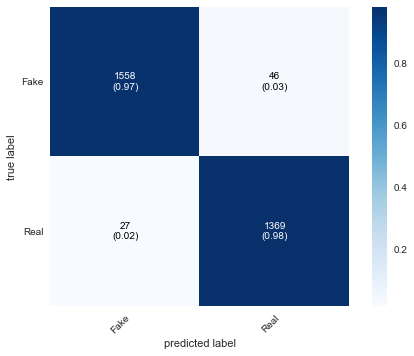

In [49]:
mlp=MLPClassifier()
algorithm(mlp)

# Random Forest Classifier

Train score : 1.0
Test score : 0.98
Train CV mean : 0.98


,precision,recall,f1-score,support
0,0.976309,0.985525,0.980896,1589
1,0.983524,0.973069,0.978269,1411
accuracy,0.979667,0.979667,0.979667,0
macro avg,0.979917,0.979297,0.979582,3000
weighted avg,0.979703,0.979667,0.979660,3000



----------------------Confusion Matrix---------------------- 



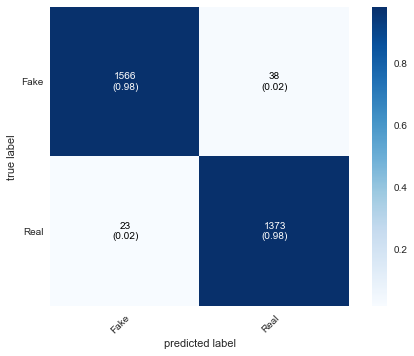

In [51]:
rf=RandomForestClassifier()
algorithm(rf)

In [52]:
Technique = ["GaussianNB","BernoulliNB","MLPClassifier","RandomForestClassifier"]
results=pd.DataFrame({'Model': Technique,'Accuracy(Train)': train_scores,'Accuracy(Test)': test_scores,
                      'CV score mean(Train)': CV})
display(results)

,Model,Accuracy(Train),Accuracy(Test),CV score mean(Train)
0,GaussianNB,0.98,0.83,0.85
1,BernoulliNB,0.98,0.96,0.96
2,MLPClassifier,1.00,0.98,0.98
3,RandomForestClassifier,1.00,0.98,0.98


In [195]:
df_fake['news'] = df_fake['title'] +'\n '+ df_fake['text']

In [196]:
df_true['news'] = df_true['title'] +'\n '+ df_true['text']

In [197]:
print(df_fake['news'][0])

 Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing
 Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this 

In [198]:
print(df_true['news'][0])

As U.S. budget fight looms, Republicans flip their fiscal script
 WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [199]:
from nltk.corpus import stopwords
sw = stopwords.words("english")
len(sw)

179